In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt


In [4]:
#inter area connectivity

connectivity_table=pd.read_excel(r"D:\CC_TC_CT_clusters.xlsx")
connectivity_table

,Source Major Division,Target Major Division,source,creline,target,Line-Source PN Class,Layer Selectivity,Layer - Class,L4/no L4,hemi,Cortical Source Module,Cortical Target Module,Source-Target Module Match,L1,L2/3,L4 (or median all layers),L5,L6a,Cortical CLUSTER ORDER,Cluster ID
0,isocortex,isocortex,RSPagl,C57BL/6J / Emx1,RSPagl,IT PT CT,All,All-IT PT CT,no L4,contra,Medial,Medial,intra-module,0.647307,1.040134,0.905569,0.771003,1.666996,5389,5
1,isocortex,isocortex,RSPagl,Cux2-IRES-Cre,RSPagl,IT,L2/3,L2/3-IT,no L4,contra,Medial,Medial,intra-module,0.397844,1.411390,0.937294,1.314706,0.559881,2573,3
2,isocortex,isocortex,RSPagl,Tlx3-Cre_PL56,RSPagl,IT,L5,L5-IT,no L4,contra,Medial,Medial,intra-module,0.741304,1.471042,0.859884,0.717667,0.978463,5200,5
3,isocortex,isocortex,RSPd,A930038C07Rik-Tg1-Cre,RSPagl,PT CT,L5,L5-PT CT,no L4,ipsi,Medial,Medial,intra-module,1.786034,0.238874,1.172928,0.946696,1.399160,3052,6
4,isocortex,isocortex,RSPd,C57BL/6J / Emx1,RSPagl,IT PT CT,All,All-IT PT CT,no L4,ipsi,Medial,Medial,intra-module,1.035737,0.467189,0.991287,0.946837,1.835060,3385,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,thalamus,isocortex,LP,Grik4-Cre,VISrl,multiareal,NaN,NaN,L4,ipsi,NaN,Visual,NaN,0.384202,0.085153,0.248075,0.635456,2.674910,7051,9
7059,thalamus,isocortex,PF,Efr3a-Cre_NO108,VISrl,IL-type,NaN,NaN,L4,ipsi,NaN,Visual,NaN,1.464853,0.159515,0.494032,0.893800,2.283770,4641,6
7060,thalamus,isocortex,POL,Grm2-Cre_MR90,VISrl,multiareal,NaN,NaN,L4,ipsi,NaN,Visual,NaN,1.270000,0.170000,0.450000,1.160000,2.250000,4657,6
7061,thalamus,isocortex,RE,Calb1-T2A-dgCre,VISrl,multiareal,NaN,NaN,L4,ipsi,NaN,Visual,NaN,3.675974,0.129765,0.145246,0.545457,0.962152,4477,6


In [26]:
is_c57_expt=(
    (connectivity_table['Layer Selectivity']=="All") &
    (connectivity_table['creline']=='C57BL/6J') | (connectivity_table['creline']=='C57BL/6J / Emx1')
)

connectivity_table['is_c57_expt']=is_c57_expt

In [31]:
#add mean connectivity column
connectivity_table['mean_connectivity']=connectivity_table[['L1','L2/3','L4 (or median all layers)','L5','L6a']].mean(axis=1)
connectivity_table['sum_connectivity']=connectivity_table[['L1','L2/3','L4 (or median all layers)','L5','L6a']].sum(axis=1)
connectivity_table

,Source Major Division,Target Major Division,source,creline,target,Line-Source PN Class,Layer Selectivity,Layer - Class,L4/no L4,hemi,...,L2/3,L4 (or median all layers),L5,L6a,Cortical CLUSTER ORDER,Cluster ID,mean connectivity,is_c57_expt,mean_connectivity,sum_connectivity
0,isocortex,isocortex,RSPagl,C57BL/6J / Emx1,RSPagl,IT PT CT,All,All-IT PT CT,no L4,contra,...,1.040134,0.905569,0.771003,1.666996,5389,5,1.006202,True,1.006202,5.031009
1,isocortex,isocortex,RSPagl,Cux2-IRES-Cre,RSPagl,IT,L2/3,L2/3-IT,no L4,contra,...,1.411390,0.937294,1.314706,0.559881,2573,3,0.924223,False,0.924223,4.621115
2,isocortex,isocortex,RSPagl,Tlx3-Cre_PL56,RSPagl,IT,L5,L5-IT,no L4,contra,...,1.471042,0.859884,0.717667,0.978463,5200,5,0.953672,False,0.953672,4.768361
3,isocortex,isocortex,RSPd,A930038C07Rik-Tg1-Cre,RSPagl,PT CT,L5,L5-PT CT,no L4,ipsi,...,0.238874,1.172928,0.946696,1.399160,3052,6,1.108738,False,1.108738,5.543692
4,isocortex,isocortex,RSPd,C57BL/6J / Emx1,RSPagl,IT PT CT,All,All-IT PT CT,no L4,ipsi,...,0.467189,0.991287,0.946837,1.835060,3385,6,1.055222,True,1.055222,5.276110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,thalamus,isocortex,LP,Grik4-Cre,VISrl,multiareal,NaN,NaN,L4,ipsi,...,0.085153,0.248075,0.635456,2.674910,7051,9,0.805559,False,0.805559,4.027797
7059,thalamus,isocortex,PF,Efr3a-Cre_NO108,VISrl,IL-type,NaN,NaN,L4,ipsi,...,0.159515,0.494032,0.893800,2.283770,4641,6,1.059194,False,1.059194,5.295970
7060,thalamus,isocortex,POL,Grm2-Cre_MR90,VISrl,multiareal,NaN,NaN,L4,ipsi,...,0.170000,0.450000,1.160000,2.250000,4657,6,1.060000,False,1.060000,5.300000
7061,thalamus,isocortex,RE,Calb1-T2A-dgCre,VISrl,multiareal,NaN,NaN,L4,ipsi,...,0.129765,0.145246,0.545457,0.962152,4477,6,1.091719,False,1.091719,5.458593


In [36]:
#take the mean across all crelines
unique_sources=connectivity_table.query('is_c57_expt')['source'].unique()
unique_targets=connectivity_table.query('is_c57_expt')['target'].unique()

# fig,ax=plt.subplots(1,1)
# connectivity_table.query('is_c57_expt').groupby(['source','target'])['mean_connectivity'].mean()

# fig,ax=plt.subplots(1,1,figsize=(10,10))
# ax.hist(connectivity_table.query('is_c57_expt').groupby(['source','target'])['mean_connectivity'].mean().values)


In [37]:
connectivity_table['cortical_source_module']=connectivity_table['Cortical Source Module']
connectivity_table['cortical_target_module']=connectivity_table['Cortical Target Module']

connectivity_table.query('is_c57_expt and cortical_source_module==cortical_target_module')['mean_connectivity'].mean()


0.9816006502949796

In [38]:
connectivity_table.query('is_c57_expt and cortical_source_module!=cortical_target_module')['mean_connectivity'].mean()

0.9999830200109875

In [39]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from pathlib import Path

output_dir = r"D:\mouse_connectivity"
mcc = MouseConnectivityCache(manifest_file=Path(output_dir) / 'manifest.json')

all_experiments = mcc.get_experiments(dataframe=True)
print("%d total experiments" % len(all_experiments))

2992 total experiments


In [40]:
cre_neg_experiments = mcc.get_experiments(cre=False)

print("%d cre-negative experiments" % len(cre_neg_experiments))

498 cre-negative experiments


In [45]:
cre_neg_experiments_df=pd.DataFrame(cre_neg_experiments)
cre_neg_experiments_df

,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,id,primary_injection_structure
0,M,"[104, 119, 583, 672, 952, 985]",0.224146,3870,5130,7650,5,378-1869,C57BL/6J,CP,672,Caudoputamen,None,None,272824561,672
1,M,"[12, 128, 197, 214, 246, 591, 749, 795, 975, 5...",0.814091,8460,4390,5640,5,378-1116,C57BL/6J,MRN,128,Midbrain reticular nucleus,None,None,113400134,128
2,M,"[131, 295, 329, 536, 672, 1022]",0.404726,6890,4550,8790,5,378-1193,C57BL/6J,CP,672,Caudoputamen,None,None,117317884,672
3,M,"[541, 1002, 1027]",0.088310,8470,2740,9750,5,378-1817,C57BL/6J,AUDpo,1027,Posterior auditory area,None,None,180073473,1027
4,M,"[194, 491, 525, 830, 879, 886, 946, 980, 1004,...",0.348138,7680,5950,5690,5,378-1442,C57BL/6J,PH,946,Posterior hypothalamic nucleus,None,None,127710392,946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,M,"[155, 170, 218, 361, 463, 718, 733, 1020]",0.099815,7070,4360,7650,5,378-1637,C57BL/6J,VPM,733,Ventral posteromedial nucleus of the thalamus,None,None,158375425,733
494,M,"[27, 170, 178, 797, 563807439]",0.150701,8050,3580,8300,5,378-1542,C57BL/6J,LGv,178,Ventral part of the lateral geniculate complex,None,None,147212977,178
495,M,"[731, 746, 972]",0.282773,2350,3590,6020,5,378-1347,C57BL/6J,ORBm,731,"Orbital area, medial part",None,None,126860974,731
496,M,[1039],0.004262,13090,5100,6030,5,378-1182,C57BL/6J,GR,1039,Gracile nucleus,None,None,114400640,1039


In [52]:
structure_tree = mcc.get_structure_tree()
summary_structures = structure_tree.get_structures_by_set_id([167587189])
summary_structures_df=pd.DataFrame(summary_structures)
summary_structures_df

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945...","[38, 143, 69]"
1,MOp,1,18,985,Primary motor area,"[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
2,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
...,...,...,...,...,...,...,...,...
311,FN,1,1097,989,Fastigial nucleus,"[997, 8, 512, 519, 989]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
312,IP,1,1098,91,Interposed nucleus,"[997, 8, 512, 519, 91]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
313,DN,1,1099,846,Dentate nucleus,"[997, 8, 512, 519, 846]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
314,VeCB,1,1100,589508455,Vestibulocerebellar nucleus,"[997, 8, 512, 519, 589508455]","[112905828, 691663206, 688152368, 184527634, 1...","[255, 253, 188]"


In [81]:
cre_neg_experiment_ids=cre_neg_experiments_df['id'].values
summary_structure_ids=summary_structures_df['id'].values
pm = mcc.get_projection_matrix(experiment_ids = cre_neg_experiment_ids, 
                               projection_structure_ids = summary_structure_ids,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'normalized_projection_volume')

c:\Anaconda3\envs\dr_ibl_analysis\Lib\site-packages\allensdk\core\mouse_connectivity_cache.py:489: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reader=lambda x: pd.read_csv(x, index_col=0, parse_dates=True),
c:\Anaconda3\envs\dr_ibl_analysis\Lib\site-packages\allensdk\core\mouse_connectivity_cache.py:489: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reader=lambda x: pd.read_csv(x, index_col=0, parse_dates=True),
c:\Anaconda3\envs\dr_ibl_analysis\Lib\site-packages\allensdk\core\mouse_connectivity_cache.py:489: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reader=lambda x: 

In [82]:
pm

{'matrix': array([[3.22211907e-02, 3.82512908e-02, 7.11921985e-02, ...,
         0.00000000e+00, 1.14085300e-06, 2.24224604e-01],
        [3.14555920e-04, 4.84167103e-03, 6.74828646e-03, ...,
         1.31061725e-06, 5.90225868e-05, 2.09412998e-01],
        [9.60115768e-03, 5.81897769e-02, 2.38901360e-01, ...,
         0.00000000e+00, 5.65127010e-06, 4.03641271e-01],
        ...,
        [8.20887001e-02, 6.05935910e-02, 4.56272678e-01, ...,
         0.00000000e+00, 1.29042237e-05, 7.67567299e-01],
        [8.73038350e-04, 7.34972332e-03, 6.58565028e-03, ...,
         6.22167045e-06, 0.00000000e+00, 8.69175798e-01],
        [2.56910784e-03, 1.15319215e+00, 3.79613092e-01, ...,
         5.62096719e-05, 5.23357615e-04, 1.45709686e+00]]),
 'rows': array([272824561, 113400134, 117317884, 180073473, 127710392, 307297141,
        180917660, 174360333, 100140949, 156978574, 147790181, 100141454,
        126523791, 146046430, 272916202, 175106053, 147162027, 126352037,
        131068390, 120812

In [83]:
sel_exp_id=pm['rows'][0]

cre_neg_experiments_df.query('id==@sel_exp_id')['structure_abbrev'].values

array(['CP'], dtype=object)

In [84]:
pm['columns']

[{'hemisphere_id': 2, 'structure_id': 184, 'label': 'FRP-R'},
 {'hemisphere_id': 2, 'structure_id': 985, 'label': 'MOp-R'},
 {'hemisphere_id': 2, 'structure_id': 993, 'label': 'MOs-R'},
 {'hemisphere_id': 2, 'structure_id': 353, 'label': 'SSp-n-R'},
 {'hemisphere_id': 2, 'structure_id': 329, 'label': 'SSp-bfd-R'},
 {'hemisphere_id': 2, 'structure_id': 337, 'label': 'SSp-ll-R'},
 {'hemisphere_id': 2, 'structure_id': 345, 'label': 'SSp-m-R'},
 {'hemisphere_id': 2, 'structure_id': 369, 'label': 'SSp-ul-R'},
 {'hemisphere_id': 2, 'structure_id': 361, 'label': 'SSp-tr-R'},
 {'hemisphere_id': 2, 'structure_id': 182305689, 'label': 'SSp-un-R'},
 {'hemisphere_id': 2, 'structure_id': 378, 'label': 'SSs-R'},
 {'hemisphere_id': 2, 'structure_id': 1057, 'label': 'GU-R'},
 {'hemisphere_id': 2, 'structure_id': 677, 'label': 'VISC-R'},
 {'hemisphere_id': 2, 'structure_id': 1011, 'label': 'AUDd-R'},
 {'hemisphere_id': 2, 'structure_id': 1002, 'label': 'AUDp-R'},
 {'hemisphere_id': 2, 'structure_id': 1

In [85]:
map_expt_ids_to_structures={
    'expt_id':[],
    'structure_abbrev':[],
}

for expt_id in pm['rows']:
    struct_abbrev=cre_neg_experiments_df.query('id==@expt_id')['structure_abbrev'].values[0]

    map_expt_ids_to_structures['expt_id'].append(expt_id)
    map_expt_ids_to_structures['structure_abbrev'].append(struct_abbrev)

map_expt_ids_to_structures_df=pd.DataFrame(map_expt_ids_to_structures)
map_expt_ids_to_structures_df

,expt_id,structure_abbrev
0,272824561,CP
1,113400134,MRN
2,117317884,CP
3,180073473,AUDpo
4,127710392,PH
...,...,...
493,158375425,VPM
494,147212977,LGv
495,126860974,ORBm
496,114400640,GR


In [86]:
target_labels=[]

for column in pm['columns']:
    target_labels.append(column['label'])

target_labels

['FRP-R',
 'MOp-R',
 'MOs-R',
 'SSp-n-R',
 'SSp-bfd-R',
 'SSp-ll-R',
 'SSp-m-R',
 'SSp-ul-R',
 'SSp-tr-R',
 'SSp-un-R',
 'SSs-R',
 'GU-R',
 'VISC-R',
 'AUDd-R',
 'AUDp-R',
 'AUDpo-R',
 'AUDv-R',
 'VISal-R',
 'VISam-R',
 'VISl-R',
 'VISp-R',
 'VISpl-R',
 'VISpm-R',
 'VISli-R',
 'VISpor-R',
 'ACAd-R',
 'ACAv-R',
 'PL-R',
 'ILA-R',
 'ORBl-R',
 'ORBm-R',
 'ORBvl-R',
 'AId-R',
 'AIp-R',
 'AIv-R',
 'RSPagl-R',
 'RSPd-R',
 'RSPv-R',
 'VISa-R',
 'VISrl-R',
 'TEa-R',
 'PERI-R',
 'ECT-R',
 'MOB-R',
 'AOB-R',
 'AON-R',
 'TT-R',
 'DP-R',
 'PIR-R',
 'NLOT-R',
 'COAa-R',
 'COAp-R',
 'PAA-R',
 'TR-R',
 'CA1-R',
 'CA2-R',
 'CA3-R',
 'DG-R',
 'FC-R',
 'IG-R',
 'ENTl-R',
 'ENTm-R',
 'PAR-R',
 'POST-R',
 'PRE-R',
 'SUB-R',
 'ProS-R',
 'HATA-R',
 'APr-R',
 'CLA-R',
 'EPd-R',
 'EPv-R',
 'LA-R',
 'BLA-R',
 'BMA-R',
 'PA-R',
 'CP-R',
 'ACB-R',
 'FS-R',
 'OT-R',
 'LSc-R',
 'LSr-R',
 'LSv-R',
 'SF-R',
 'SH-R',
 'AAA-R',
 'BA-R',
 'CEA-R',
 'IA-R',
 'MEA-R',
 'GPe-R',
 'GPi-R',
 'SI-R',
 'MA-R',
 'MS-R',
 'NDB-

In [87]:
unique_structures=cre_neg_experiments_df['structure_abbrev'].unique()

source_structure_means={
    'source_structure':[],
    'structure_experiment_ids':[],
    'n_expts':[],
    'projection_metric':[],
}

for structure in unique_structures:
    structure_expts=map_expt_ids_to_structures_df.query('structure_abbrev==@structure')['expt_id'].values

    structure_connectivity=[]

    for expt_id in structure_expts:
        index_in_matrix=np.where(pm['rows']==expt_id)[0][0]
        expt_connectivity=pm['matrix'][index_in_matrix,:]
        structure_connectivity.append(expt_connectivity)
    
    source_structure_means['source_structure'].append(structure)
    source_structure_means['structure_experiment_ids'].append(structure_expts)
    source_structure_means['n_expts'].append(len(structure_expts))
    source_structure_means['projection_metric'].append(np.mean(np.vstack(structure_connectivity),axis=0))

    
source_structure_means_df=pd.DataFrame(source_structure_means)
source_structure_means_df


,source_structure,structure_experiment_ids,n_expts,projection_metric
0,CP,"[272824561, 117317884, 127762867, 113766038, 1...",19,"[0.012375057589914898, 0.22622637515566013, 0...."
1,MRN,"[113400134, 156978574, 126352037, 139311530, 1...",16,"[0.00013728146502595722, 0.0036588346809792813..."
2,AUDpo,"[180073473, 115958825]",2,"[0.00055316840586145, 0.11119491919517614, 0.2..."
3,PH,"[127710392, 175374275, 112425523, 100141434, 1...",5,"[0.019527105679290883, 0.07271960699064722, 0...."
4,VISp,"[307297141, 113887162, 180296424, 100147853, 3...",33,"[0.0002861890694342628, 0.009475897676575442, ..."
...,...,...,...,...
152,PIL,[127396051],1,"[3.06635358626585e-06, 0.0019294765976705, 0.0..."
153,STN,[146986331],1,"[0.0006309501718666, 0.100815735292305, 0.0514..."
154,LGv,[147212977],1,"[0.0001243246940721, 0.0014621470385388, 0.002..."
155,ORBm,[126860974],1,"[0.0820887000706823, 0.0605935910054088, 0.456..."


In [88]:
source_structure_means_df.query('n_expts>=3')

,source_structure,structure_experiment_ids,n_expts,projection_metric
0,CP,"[272824561, 117317884, 127762867, 113766038, 1...",19,"[0.012375057589914898, 0.22622637515566013, 0...."
1,MRN,"[113400134, 156978574, 126352037, 139311530, 1...",16,"[0.00013728146502595722, 0.0036588346809792813..."
3,PH,"[127710392, 175374275, 112425523, 100141434, 1...",5,"[0.019527105679290883, 0.07271960699064722, 0...."
4,VISp,"[307297141, 113887162, 180296424, 100147853, 3...",33,"[0.0002861890694342628, 0.009475897676575442, ..."
5,VISC,"[180917660, 180074890, 180436360, 174361746]",4,"[0.08401693669423366, 0.982826513413926, 0.947..."
...,...,...,...,...
119,VMH,"[175106769, 277615922, 157549402, 158258062]",4,"[0.00013797841275010547, 0.0009825371667503, 0..."
123,PRNr,"[127223428, 152995635, 272700063]",3,"[0.0021814905725526415, 0.02455536657953407, 0..."
124,PVT,"[272874417, 120875111, 127255962]",3,"[0.0007105528650031, 0.010075877238704666, 0.0..."
126,LSr,"[272917631, 125830911, 100141435]",3,"[4.344930764024297e-06, 0.0016361452512873291,..."


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_44832\3839821630.py:1: RuntimeWarning: divide by zero encountered in log
  full_matrix=np.log(np.vstack(source_structure_means_df.sort_values(by='source_structure')['projection_metric'].values))


[Text(0, 0, 'AAA'),
 Text(0, 1, 'ACAd'),
 Text(0, 2, 'ACAv'),
 Text(0, 3, 'ACB'),
 Text(0, 4, 'AHN'),
 Text(0, 5, 'AId'),
 Text(0, 6, 'AM'),
 Text(0, 7, 'AN'),
 Text(0, 8, 'AOB'),
 Text(0, 9, 'AON'),
 Text(0, 10, 'APN'),
 Text(0, 11, 'APr'),
 Text(0, 12, 'AUDd'),
 Text(0, 13, 'AUDp'),
 Text(0, 14, 'AUDpo'),
 Text(0, 15, 'AUDv'),
 Text(0, 16, 'AV'),
 Text(0, 17, 'AVPV'),
 Text(0, 18, 'BLA'),
 Text(0, 19, 'BMA'),
 Text(0, 20, 'BST'),
 Text(0, 21, 'CA1'),
 Text(0, 22, 'CA3'),
 Text(0, 23, 'CEA'),
 Text(0, 24, 'CENT'),
 Text(0, 25, 'CM'),
 Text(0, 26, 'COAp'),
 Text(0, 27, 'CP'),
 Text(0, 28, 'CS'),
 Text(0, 29, 'CUL'),
 Text(0, 30, 'CUN'),
 Text(0, 31, 'DG'),
 Text(0, 32, 'DP'),
 Text(0, 33, 'ECT'),
 Text(0, 34, 'ENTl'),
 Text(0, 35, 'ENTm'),
 Text(0, 36, 'EPd'),
 Text(0, 37, 'FN'),
 Text(0, 38, 'FRP'),
 Text(0, 39, 'GPe'),
 Text(0, 40, 'GR'),
 Text(0, 41, 'GRN'),
 Text(0, 42, 'GU'),
 Text(0, 43, 'IC'),
 Text(0, 44, 'ILA'),
 Text(0, 45, 'IP'),
 Text(0, 46, 'IPN'),
 Text(0, 47, 'IRN'),
 Te

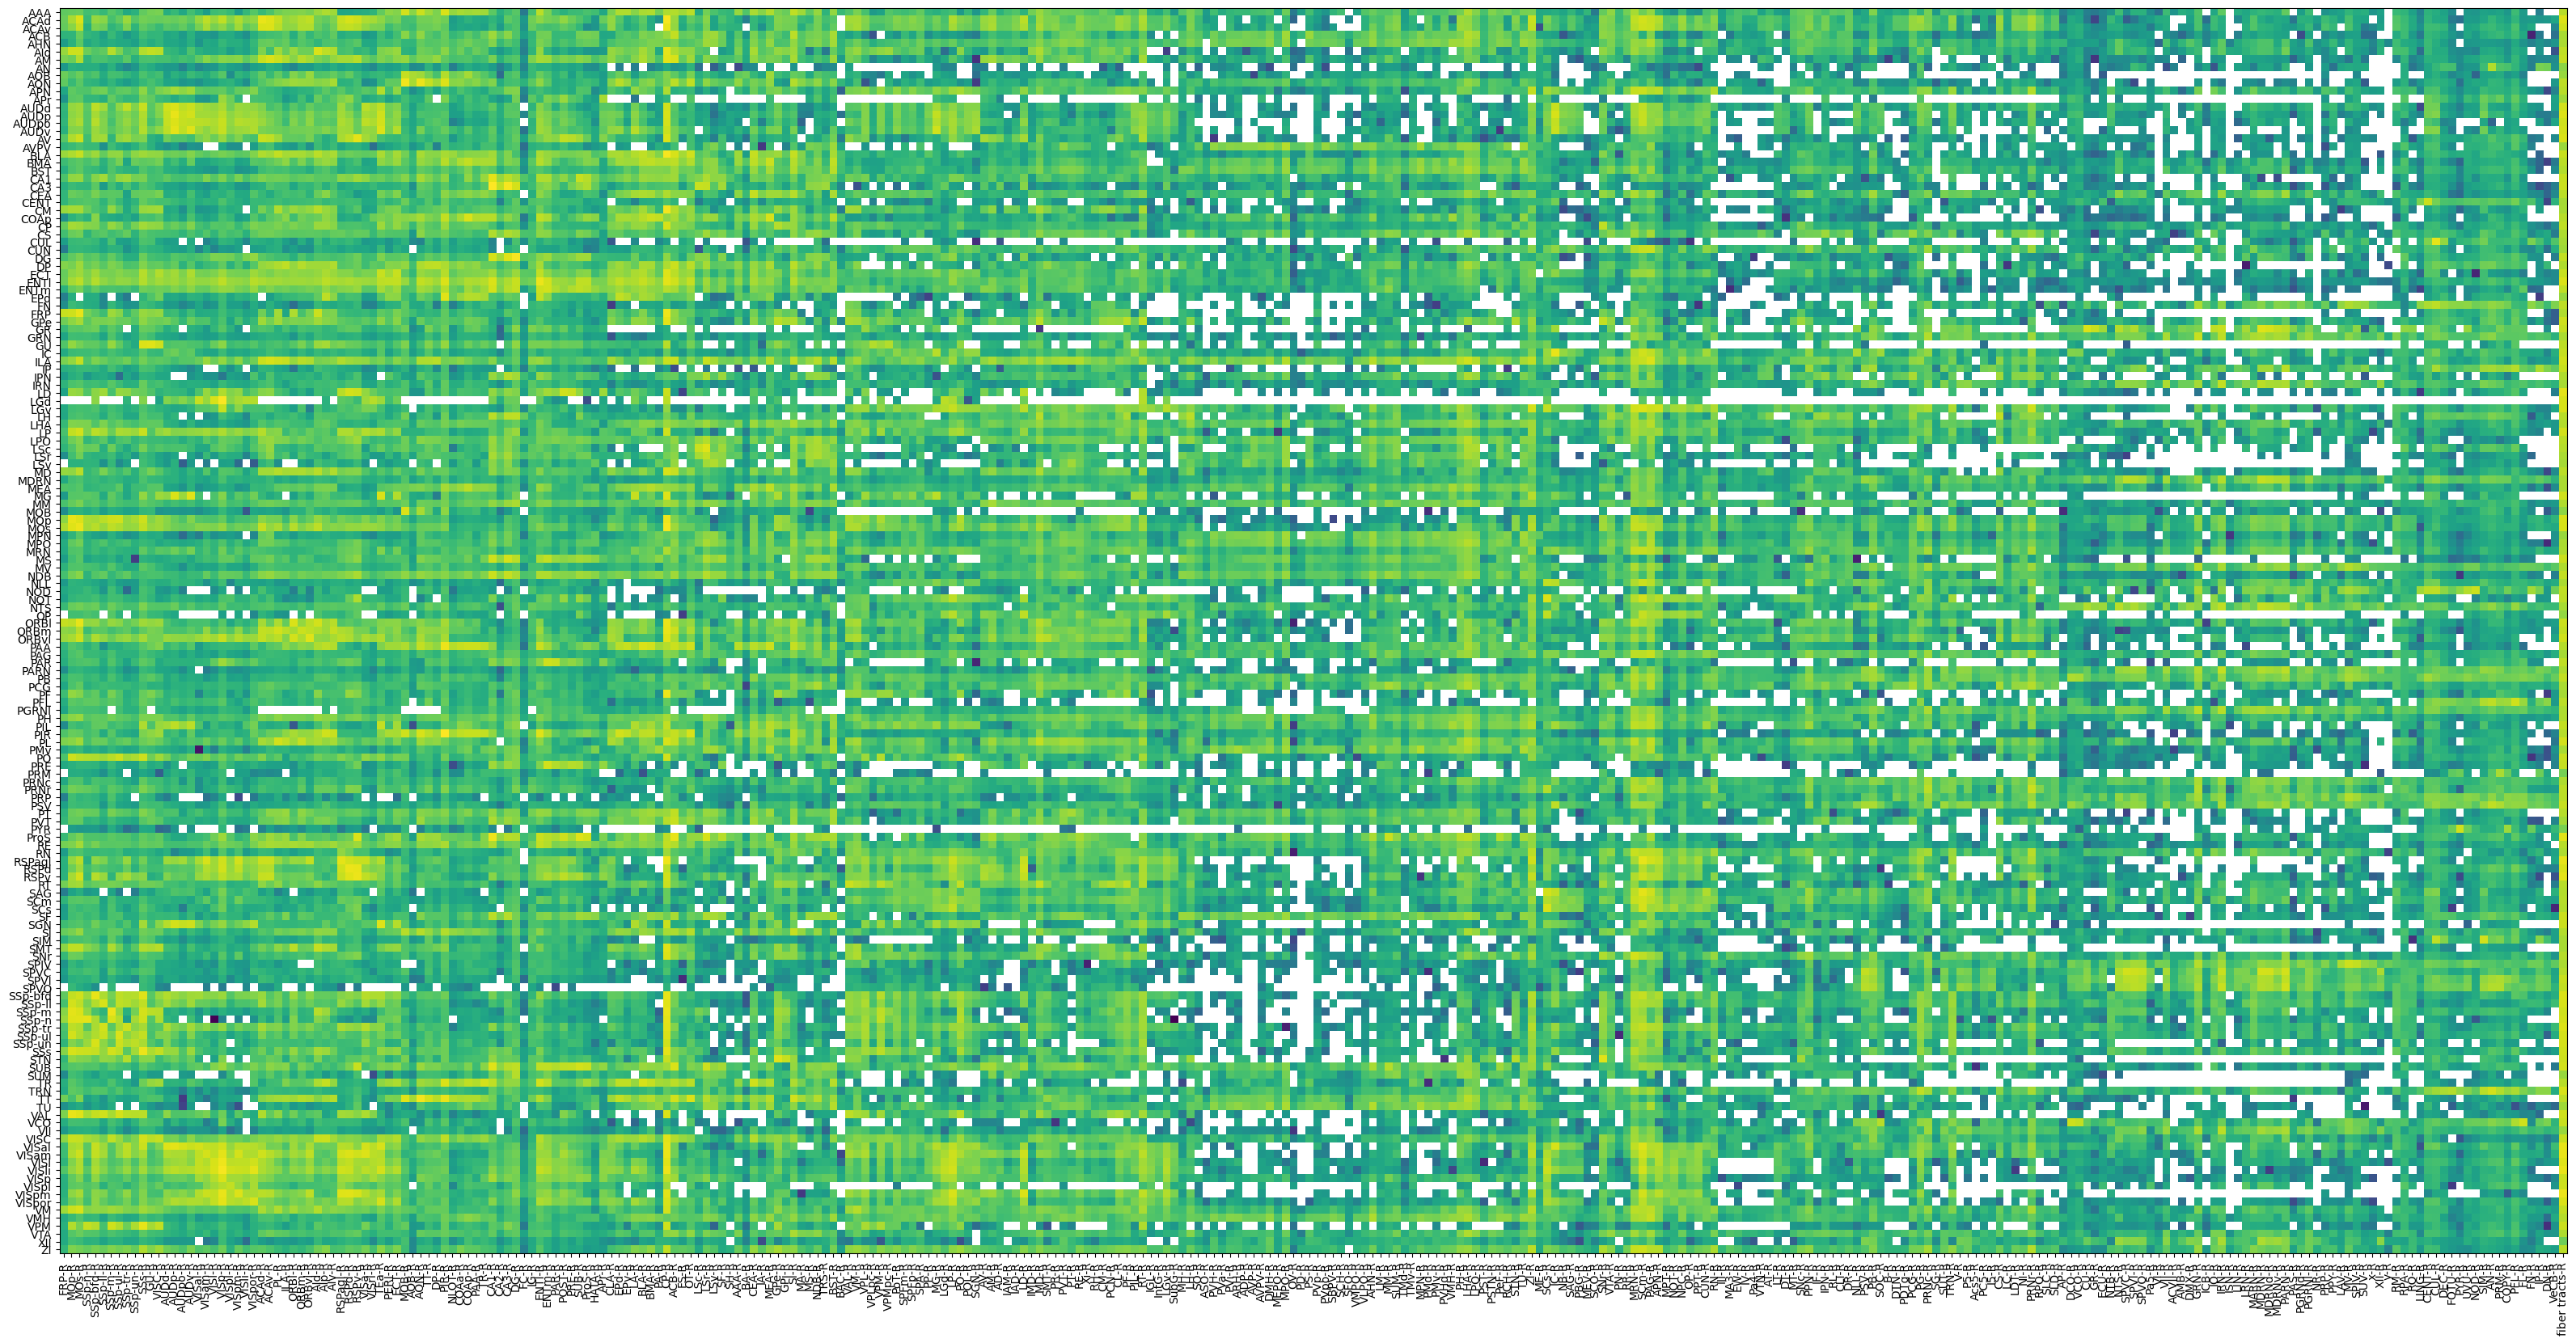

In [91]:
full_matrix=np.log(np.vstack(source_structure_means_df.sort_values(by='source_structure')['projection_metric'].values))

fig,ax=plt.subplots(1,1,figsize=(40,40))
ax.imshow(full_matrix)
ax.set_xticks(np.arange(len(target_labels)))
ax.set_xticklabels(target_labels,rotation=90)
ax.set_yticks(np.arange(len(unique_structures)))
ax.set_yticklabels(source_structure_means_df.sort_values(by='source_structure')['source_structure'].values)

In [93]:
#all experiments

all_experiments = pd.DataFrame(mcc.get_experiments())

summary_structures = structure_tree.get_structures_by_set_id([167587189])
summary_structures_df=pd.DataFrame(summary_structures)

all_experiment_ids=all_experiments['id'].values
summary_structure_ids=summary_structures_df['id'].values
pm = mcc.get_projection_matrix(experiment_ids = all_experiment_ids, 
                               projection_structure_ids = summary_structure_ids,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'normalized_projection_volume')

c:\Anaconda3\envs\dr_ibl_analysis\Lib\site-packages\allensdk\core\mouse_connectivity_cache.py:489: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reader=lambda x: pd.read_csv(x, index_col=0, parse_dates=True),
c:\Anaconda3\envs\dr_ibl_analysis\Lib\site-packages\allensdk\core\mouse_connectivity_cache.py:489: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reader=lambda x: pd.read_csv(x, index_col=0, parse_dates=True),
c:\Anaconda3\envs\dr_ibl_analysis\Lib\site-packages\allensdk\core\mouse_connectivity_cache.py:489: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reader=lambda x: 

In [95]:
all_experiments.shape

(2992, 16)